In [1]:
import json
import random
import colorsys
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import patches,  lines
import numpy as np
import IPython.display

In [7]:
# based on https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/visualize.py
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def display_instances(image, boxes,
                      figsize=(16, 16), ax=None):
    """
    boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
    figsize: (optional) the size of the image
    colors: (optional) An array or colors to use with each object
    """
    # Number of instances
    N = len(boxes)
    if not N:
        print("\n*** No instances to display *** \n")

    # If no axis is passed, create one and automatically call show()
    auto_show = False
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
        auto_show = True

    # Generate random colors
    colors = random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')

#     for box in boxes:
#         for i in range(4):
#             box[i] = box[i] / max(height, width) * 1024
    
    for i in range(N):
        color = colors[i]

        # Bounding box
        x1, y1, x2, y2 = boxes[i][:4]
        w, h = x2 - x1, y2 - y1
        p = patches.Rectangle((x1, y1), w, h, linewidth=2,
                            alpha=0.7, linestyle="dashed",
                            edgecolor=color, facecolor='none')
        ax.add_patch(p)

        # Label
        label = boxes[i][4]
        ax.text(x1, y1 + 8, label, color='w', size=15, backgroundcolor="none")

    ax.imshow(image)
    if auto_show:
        plt.show()
#     print("image height=%d, width=%d" % (height, width))
#     for box in boxes:
#         print(box)

In [5]:
infos = json.load(open('/data4/jiaxin/benchmark_debug/inference/VG_stanford_filtered_test/visual_info.json'))

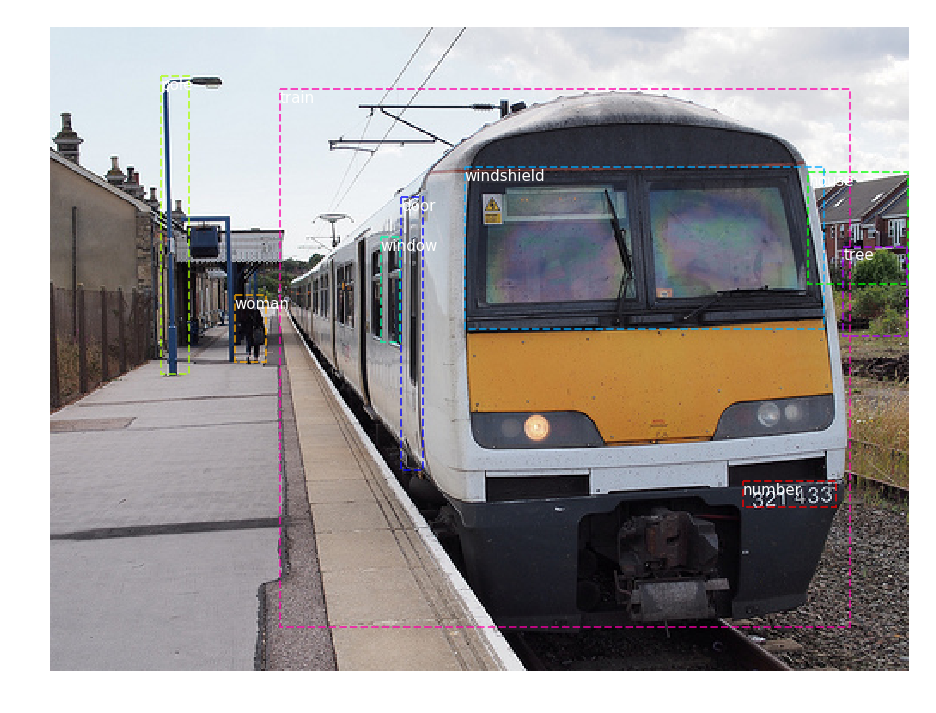

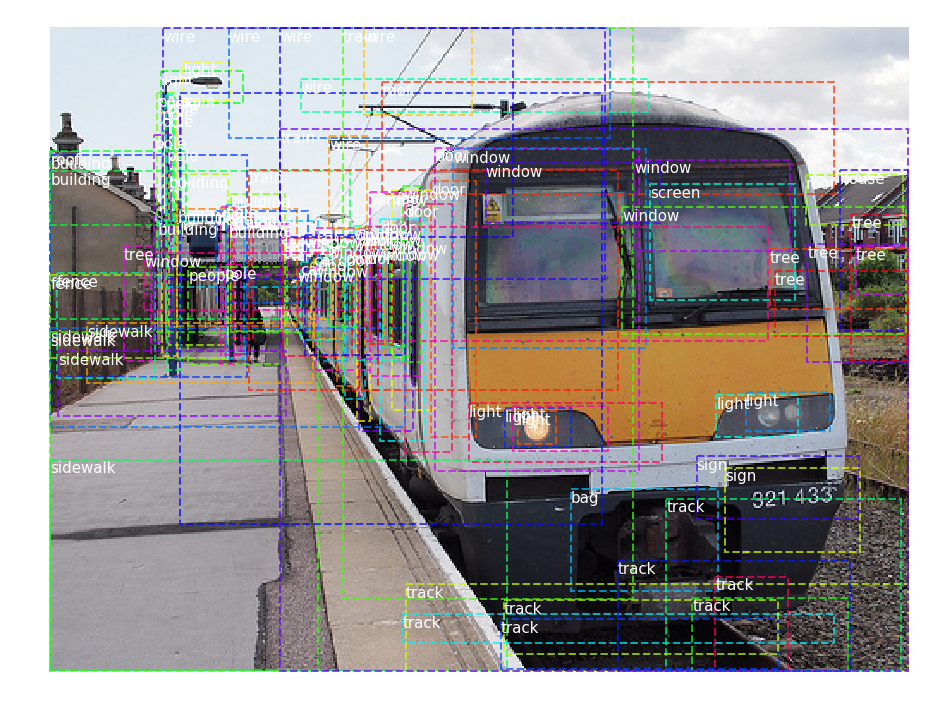

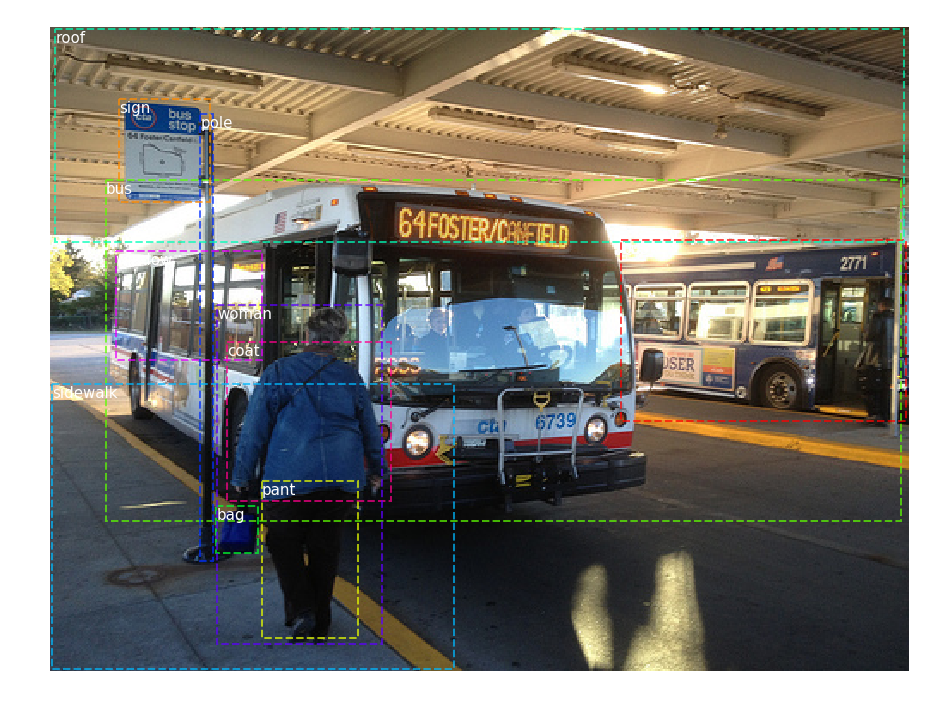

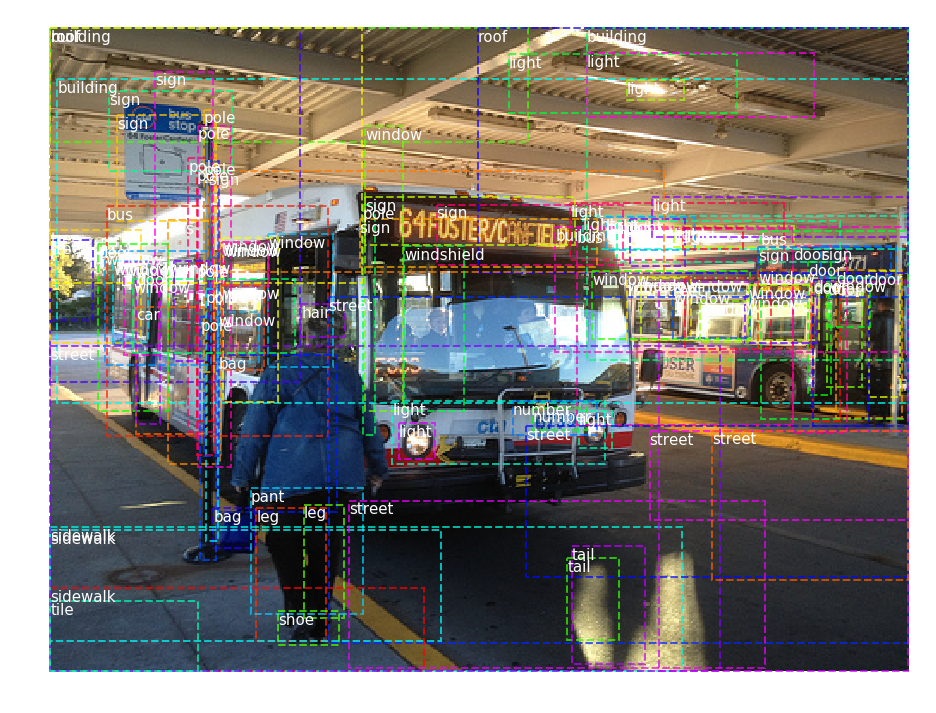

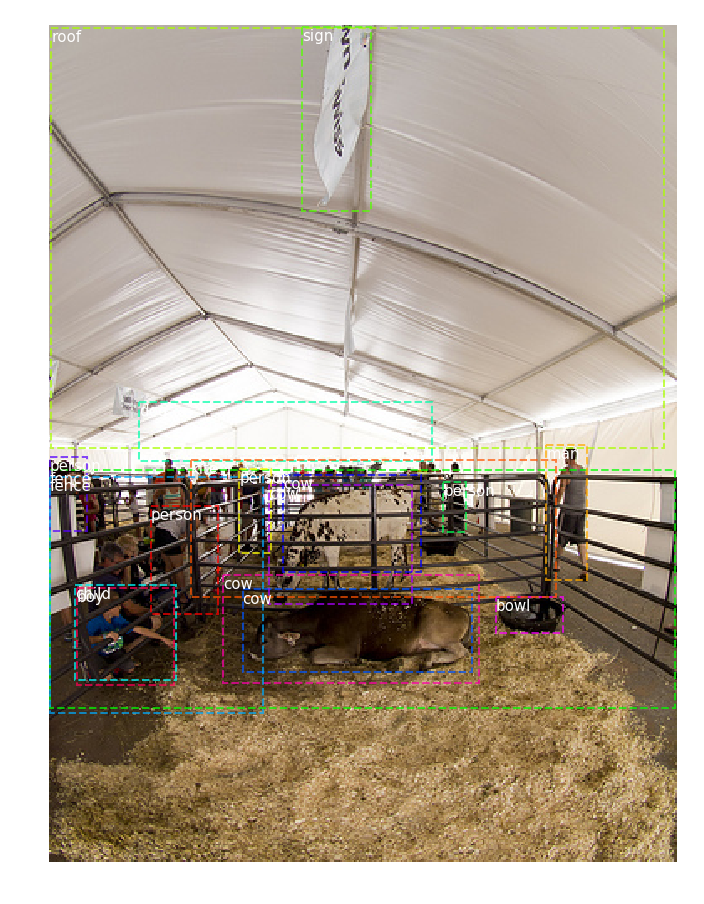

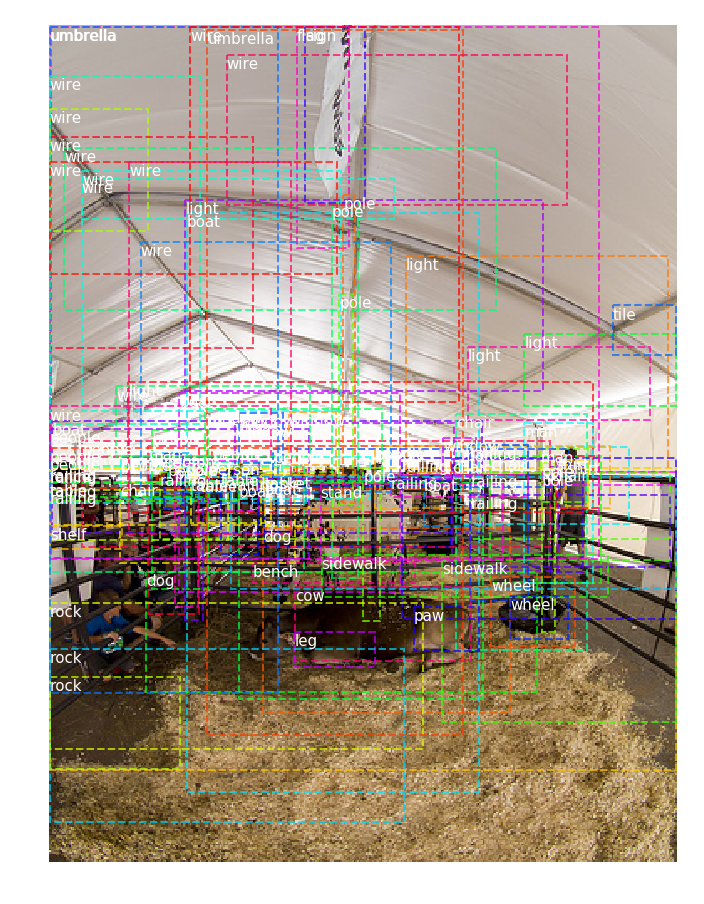

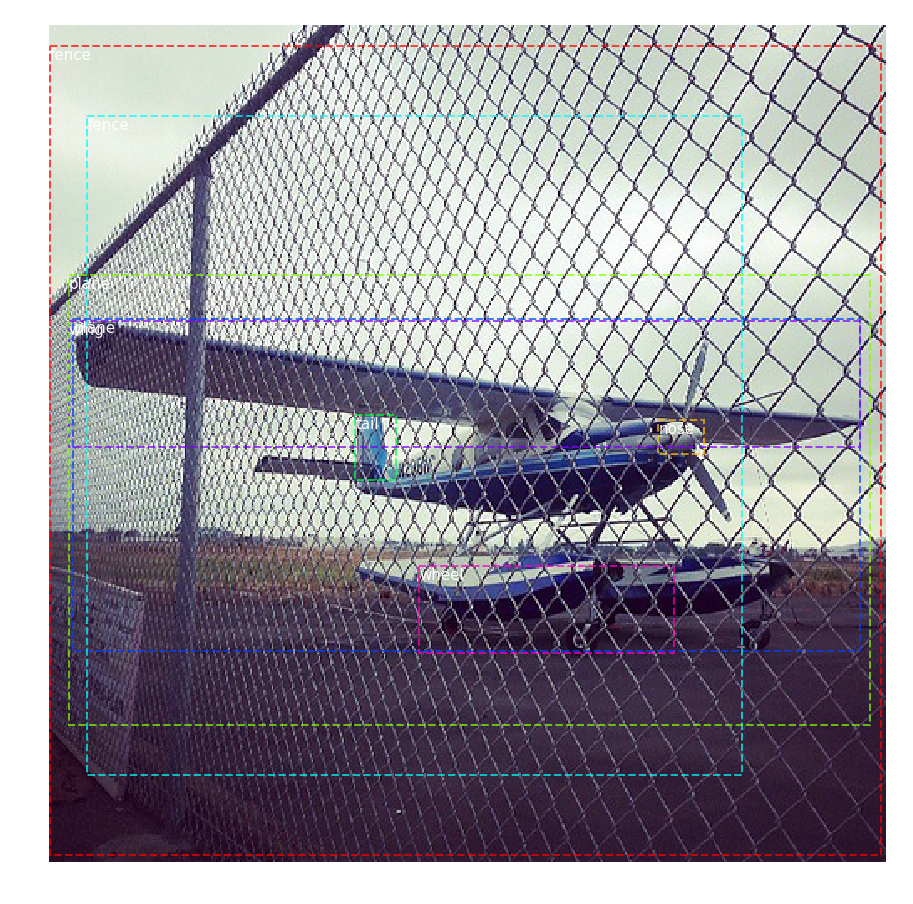

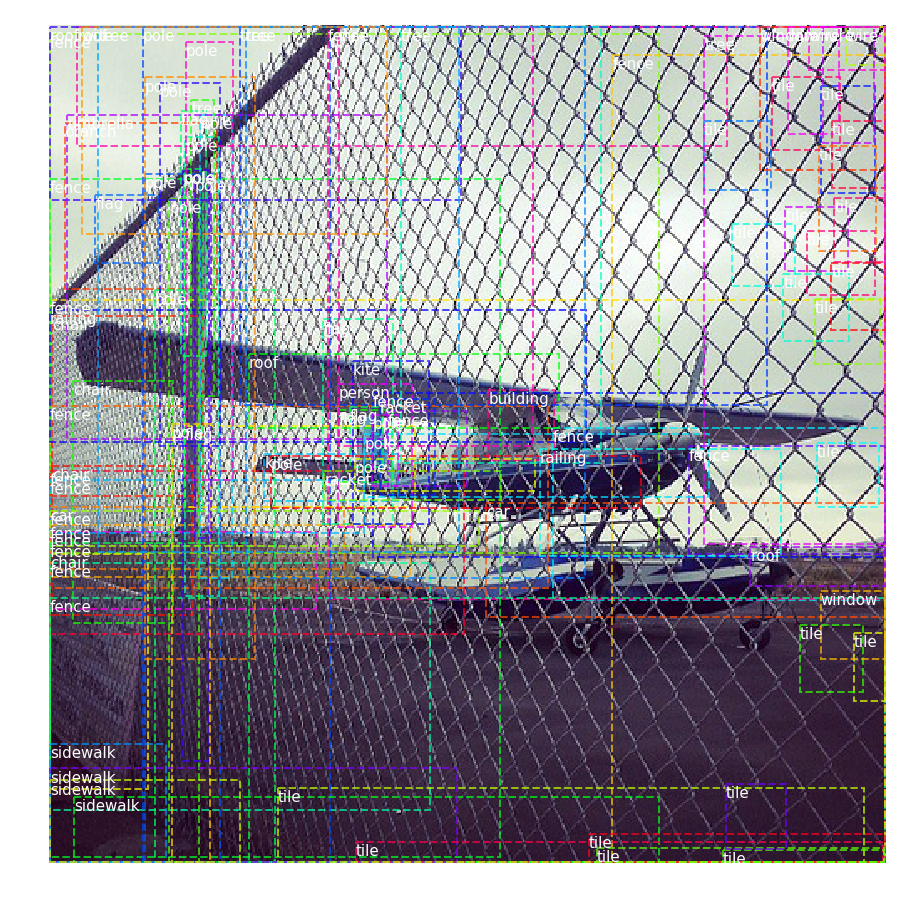

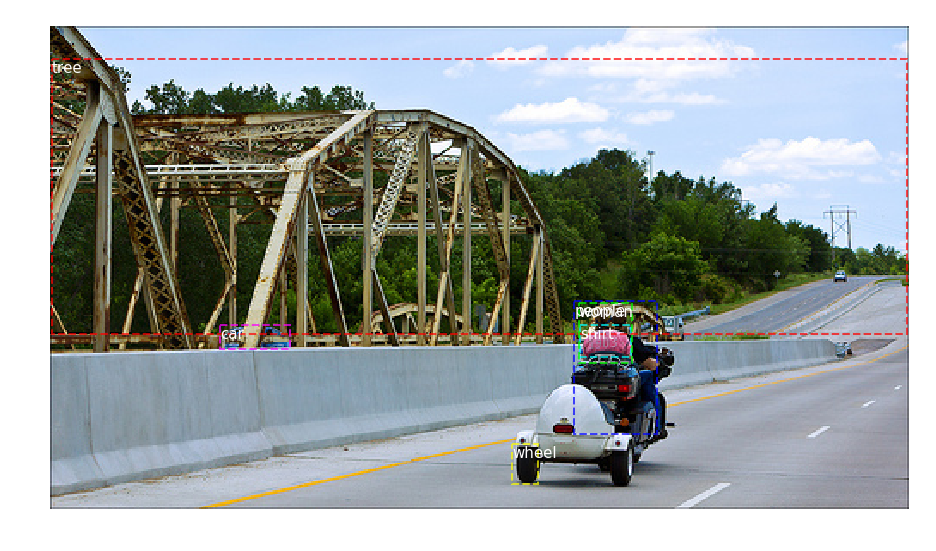

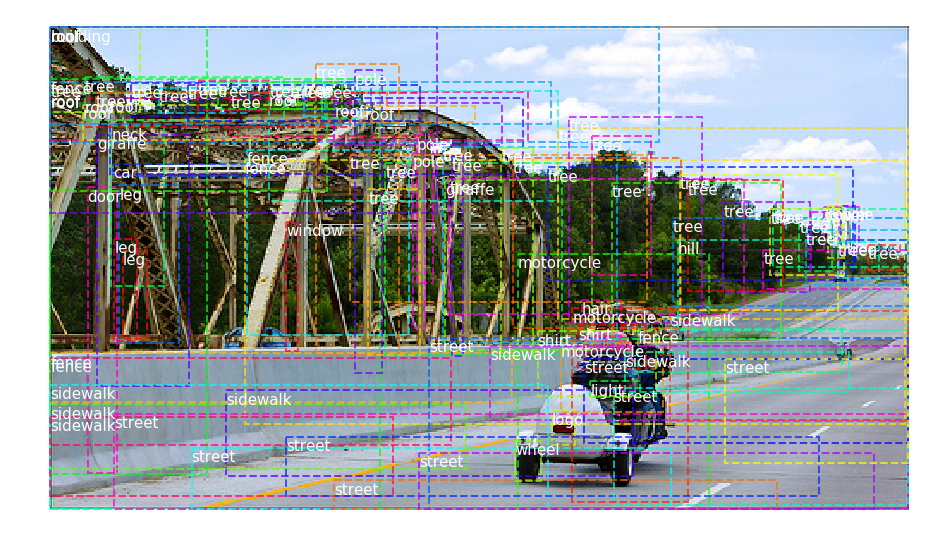

In [8]:
for i, info in enumerate(infos):
    image = Image.open(info['img_file']).convert("RGB")
    image = np.asarray(image, np.uint8)
    display_instances(image, info['groundtruth'])
    display_instances(image, info['prediction'])
    if i > 3:
        break